In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
df = pd.read_csv('data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## EDA

In [3]:
df.left.shape

(14999,)

In [4]:
total_left = np.sum(df.left)
total_left

3571

In [5]:
total_left / df.left.shape[0]

0.2380825388359224

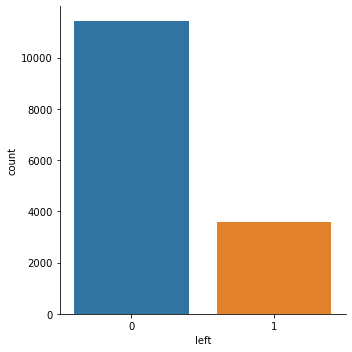

In [6]:
sns.catplot(data=df, x='left', kind='count');

In [7]:
left_low = df.loc[(df['left'] == 1) & (df['salary'] == 'low')]
left_low.shape

(2172, 10)

In [8]:
left_low.shape[0] / total_left

0.6082329879585551

In [9]:
only_left = df.loc[df.left == 1]
only_left.shape

(3571, 10)

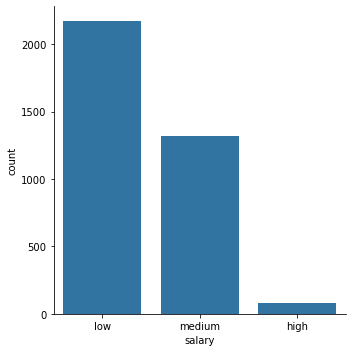

In [10]:
sns.catplot(data=only_left, x='salary', hue='left', kind='count', legend=False);

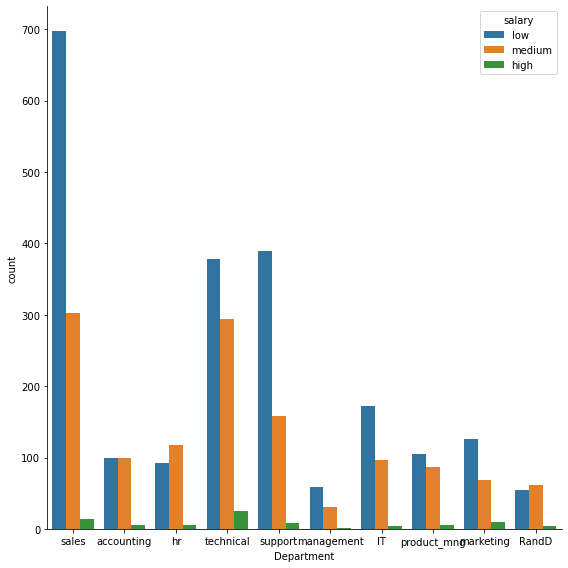

In [11]:
sns.catplot(data=only_left, x='Department', hue='salary', kind='count', legend_out=False, height=8);

### Preprocessing

In [12]:
dummies = pd.get_dummies(data=df, columns=['salary', 'Department']) 
dummies.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical'],
      dtype='object')

In [13]:
X = dummies.drop(['left'], axis=1)
y = dummies.left

X.columns.shape

(20,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test.columns.shape

(20,)

## Model

In [15]:
model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [16]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Accuracy

In [17]:
model.score(X_test, y_test)

0.801